# Stoneburner, Kurt
- ## DSC 640 - Week 05/06: Tree, Area & Stacked Charts

1 tree map, 1 area chart and 1 stacked area chart using Python


https://fcpython.com/visualisation/python-treemaps-squarify-matplotlib
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html
https://matplotlib.org/stable/tutorials/colors/colormaps.html


Convert A Colormap into categorical Colors

In [118]:
#col = 'expenditure'
#vmin=min(plot_df[col])
#vmax=max(plot_df[col])
#norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
#colors = [matplotlib.cm.inferno(norm(value)) for value in plot_df[col]]

In [8]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squarify #conda install -c conda-forge squarify

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [20]:
#z_wk05_06_expenditures.txt
#z_wk05_06_unemployement-rate-1948-2010.csv

ex_df = pd.read_csv("z_wk05_06_expenditures.txt",sep="\t")

#//*** Setup a type dictionary to associate columns with a particular type.
type_dict = {
    'year' : int,
    'category' : str,
    'expenditure' : int,
    'sex' : int,
}

#//*** Assign column types
for col,col_type in type_dict.items():
    ex_df[col] = ex_df[col].astype(col_type)

del ex_df['sex']
    
ex_df


,year,category,expenditure
0,2008,Food,6443
1,2008,Alcoholic Beverages,444
2,2008,Housing,17109
3,2008,Apparel,1801
4,2008,Transportation,8604
...,...,...,...
345,1984,Education,303
346,1984,Tobacco Products,228
347,1984,Miscellaneous,451
348,1984,Cash Contributions,706


In [70]:
out_df = pd.DataFrame()
for group in ex_df.groupby('year'):
    loop_df = group[1].copy()
    loop_df['percent'] = loop_df['expenditure'] / loop_df['expenditure'].sum()
    out_df = pd.concat([out_df,loop_df])
ex_df = out_df.copy()
del out_df

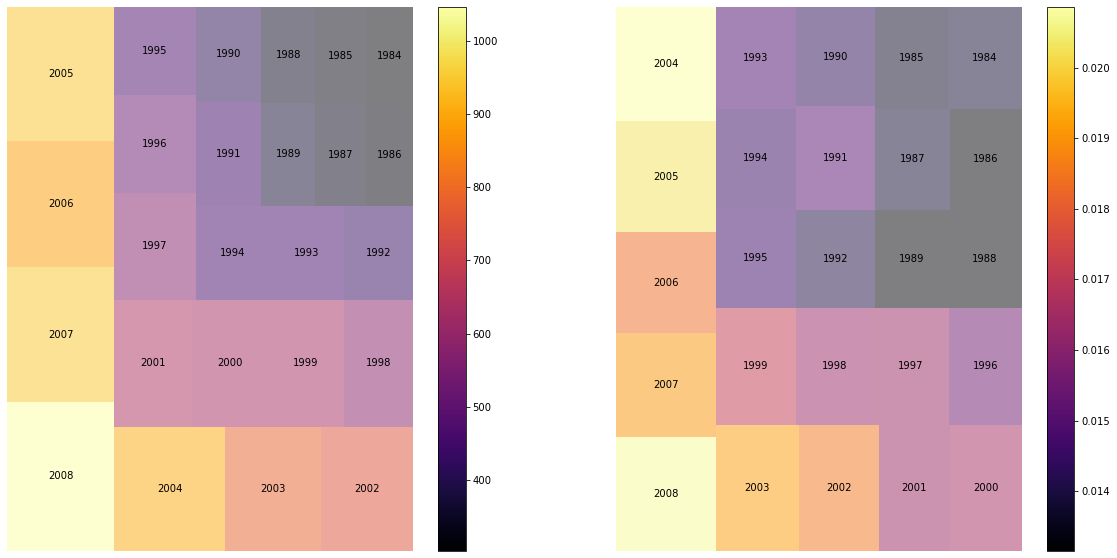

In [117]:
import matplotlib
fig, ax = plt.subplots(ncols=2)
fig = plt.gcf()
fig.set_size_inches(20,10)

plot_df = ex_df[ex_df['year']==2008]
plot_df = ex_df[ex_df['category']=='Education'].sort_values('year',ascending=False)

col = 'expenditure'
vmin=min(plot_df[col])
vmax=max(plot_df[col])
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
colors = [matplotlib.cm.inferno(norm(value)) for value in plot_df[col]]

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=plt.inferno(), norm=norm)

# empty array for the data range
sm._A = []

fig.colorbar(sm,ax=ax[0])

ax1 = squarify.plot(sizes=plot_df[col], label=plot_df['year'], alpha=.5,color=colors,ax=ax[0])
ax1.yaxis.label.set_size(106)


col = 'percent'
vmin=min(plot_df[col])
vmax=max(plot_df[col])
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
colors = [matplotlib.cm.inferno(norm(value)) for value in plot_df[col]]

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=plt.inferno(), norm=norm)

# empty array for the data range
sm._A = []

fig.colorbar(sm,ax=ax[1])
ax2 = squarify.plot(sizes=plot_df[col], label=plot_df['year'], alpha=.5,color=colors,ax=ax[1])

ax1.axis('off')
ax2.axis('off')

plt.show()
#plt.magma()
#plot_df

In [25]:
plot_df

,year,category,expenditure
0,2008,Food,6443
1,2008,Alcoholic Beverages,444
2,2008,Housing,17109
3,2008,Apparel,1801
4,2008,Transportation,8604
5,2008,Healthcare,2976
6,2008,Entertainment,2835
7,2008,Personal Care,616
8,2008,Reading,116
9,2008,Education,1046


In [91]:
emp_df = pd.read_csv("z_wk05_06_unemployement-rate-1948-2010.csv")

emp_df

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5
...,...,...,...,...
741,LNS14000000,2009,M10,10.1
742,LNS14000000,2009,M11,10.0
743,LNS14000000,2009,M12,10.0
744,LNS14000000,2010,M01,9.7


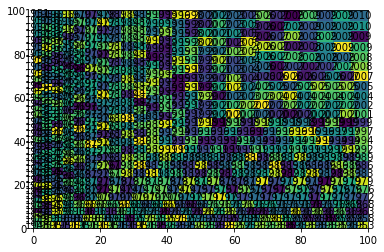

In [11]:
squarify.plot(sizes=emp_df['Value'].sort_values(),label=emp_df['Year'].astype(str))
plt.show()

In [5]:
# //*** CODE HERE

In [6]:
# //*** CODE HERE

In [7]:
# //*** CODE HERE